### Handwritten digit classification


In [1]:
from keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
x_train.shape #28*28 60000 records

(60000, 28, 28)

### showing images

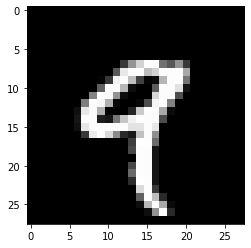

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[4],cmap="gray")

In [5]:
y_train[4]

9

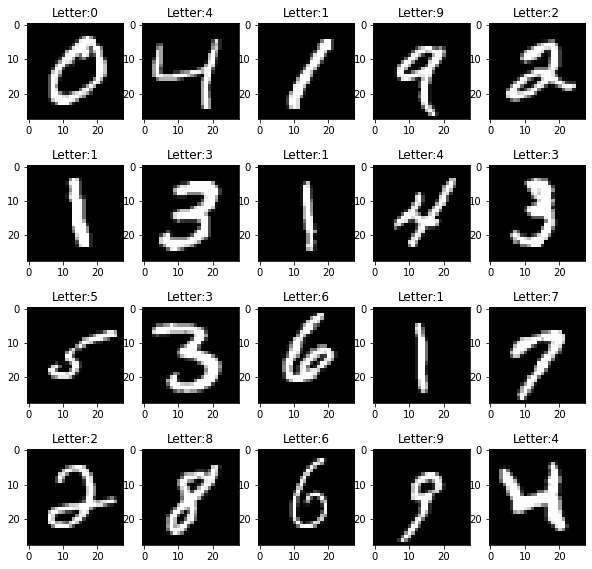

In [7]:
plt.figure(figsize=(10,10))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.imshow(x_train[i],cmap='gray')
    plt.title(f"Letter:{y_train[i]}")

### Data preprocessing

In [7]:
# scaling 
# image array lies between 0-255
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [8]:
x_test_scaled

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [9]:
 # Encoding
from keras.utils import to_categorical
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [10]:
y_test[0:3]

array([7, 2, 1], dtype=uint8)

In [11]:
y_test_cat[0:3]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Start training CNN Neural Network

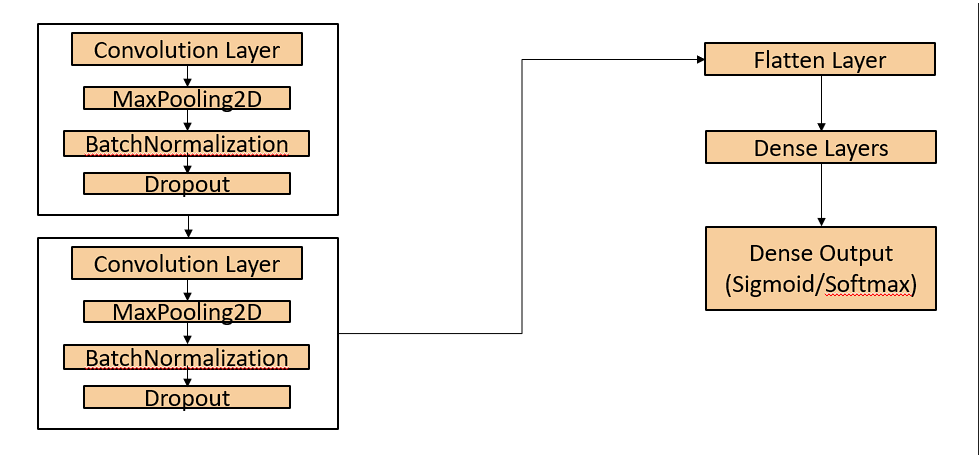

In [12]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping

In [13]:
# initialize neural network with Sequential model
nn= Sequential()

# Convolution Layer 1
nn.add(Convolution2D(filters=16,kernel_size=(3,3),input_shape=(28,28,1)))  #28*28 size of data and 1 for filter metrix
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.1))

# Convolution Layer 2
nn.add(Convolution2D(filters=16,kernel_size=(3,3)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.1))

#flatten layer
nn.add(Flatten())

# Hidden Dense Layers
nn.add(Dense(128,activation='relu'))
nn.add(Dense(128,activation='relu'))

# Output Layer
nn.add(Dense(10, activation='softmax'))


In [14]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 16)       64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0

In [15]:
early_stop=EarlyStopping(patience=3,monitor='val_loss')

In [16]:
nn.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [17]:
nn.fit(x_train_scaled,y_train_cat,validation_split=0.2,batch_size=32,epochs=100,callbacks=[early_stop])

Epoch 1/100
1500/1500 [==============================] - 17s 9ms/step - loss: 0.1720 - accuracy: 0.9462 - val_loss: 0.0623 - val_accuracy: 0.9826
Epoch 2/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0683 - accuracy: 0.9781 - val_loss: 0.0570 - val_accuracy: 0.9830
Epoch 3/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0496 - accuracy: 0.9840 - val_loss: 0.0520 - val_accuracy: 0.9861
Epoch 4/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0415 - accuracy: 0.9870 - val_loss: 0.0562 - val_accuracy: 0.9850
Epoch 5/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0339 - accuracy: 0.9890 - val_loss: 0.0533 - val_accuracy: 0.9862
Epoch 6/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0318 - accuracy: 0.9894 - val_loss: 0.0492 - val_accuracy: 0.9868
Epoch 7/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0275 - accuracy: 0.9907 - val_loss: 0.0547 -

In [19]:
# training performance
nn.evaluate(x_train_scaled,y_train_cat)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0196 - accuracy: 0.9945


[0.019562331959605217, 0.9945499897003174]

In [20]:
#testing performance
nn.evaluate(x_test_scaled,y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0454 - accuracy: 0.9880


[0.045446157455444336, 0.9879999756813049]

#### Both training and testing accuracies are same to model is performing well

In [21]:
ytrain_prob_pred=nn.predict(x_train_scaled)
ytest_prob_pred=nn.predict(x_test_scaled)

313/313 [==============================] - 1s 2ms/step


In [25]:
import numpy as np

In [38]:
ytrain_pred=np.argmax(ytrain_prob_pred,axis=-1)
ytest_pred=np.argmax(ytest_prob_pred,axis=-1)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report

<AxesSubplot:>

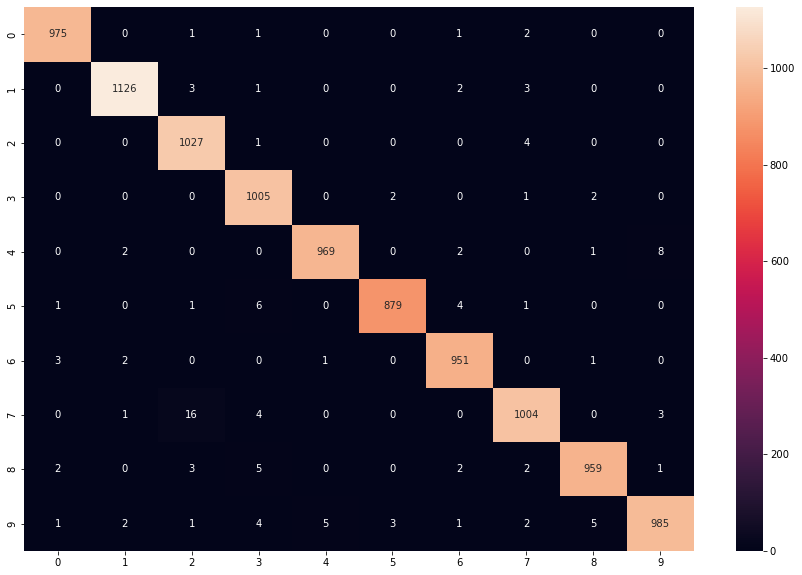

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
cf=confusion_matrix(y_test,ytest_pred)
import seaborn as sns
sns.heatmap(cf,annot=True,fmt='d')

In [44]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<AxesSubplot:>

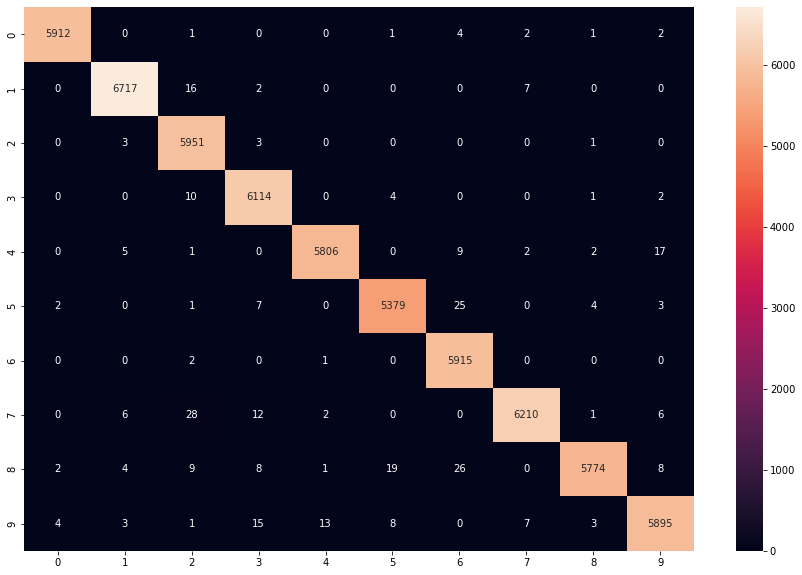

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
cf=confusion_matrix(y_train,ytrain_pred)
import seaborn as sns
sns.heatmap(cf,annot=True,fmt='d')

In [46]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       0.99      1.00      0.99      5958
           3       0.99      1.00      0.99      6131
           4       1.00      0.99      1.00      5842
           5       0.99      0.99      0.99      5421
           6       0.99      1.00      0.99      5918
           7       1.00      0.99      0.99      6265
           8       1.00      0.99      0.99      5851
           9       0.99      0.99      0.99      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



## Saving the model

In [48]:
nn.save('Digital_number_model.h5')